<a href="https://colab.research.google.com/github/Rafael-ORibeiro/Projeto_front_end_Unifaa_2021/blob/main/K_mean_e_RegressaoLog%C3%ADstica(BreastCancer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-mean e Regressão Logística para classificar o dataset Breast Cancer

* Utilizarei o dataset Breast Cancer que está no sklearn.datasets que é uma base de dados com informações de exames de pacientes, diagnosticando-os com câncer de mama malígno ou benígno

* Vou utilizar dois algorítmos, o K-mean(aprendizagem não supervisionada) e a Regressão Logística(Aprendizagem supervisionada, para classificar essa base de dados.

* Vou calcular o número de clusters que dividirão essa base de dados para a utilização do K-means

* Por fim vou avaliar os dois modelos

###Importando bibliotecas e carregando o dataset

In [227]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


####Carregando dataset
* Carregando dataset, sem o alvo, pois utilizarei primeiro o kmeans

In [228]:
df = pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)

In [229]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [231]:
#O Dataset não possui dados faltantes e inicialmente vou trabalhar com todas a variáveis

#### Verificando a quantidade ideal de clusters para a base

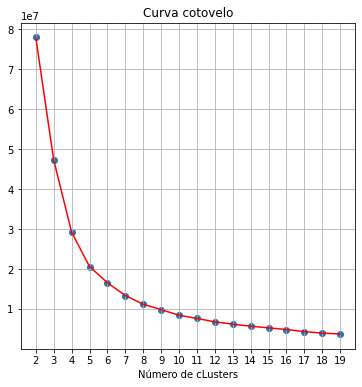

In [232]:
x = []
y = []
for i in range(2,20):
  kmeans= KMeans(n_clusters=i)
  y.append(kmeans.fit(df).inertia_)
  x.append(i)

plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.plot(x,y,color='red')
plt.title('Curva cotovelo')
plt.xlabel('Número de cLusters')
plt.xticks(x)
plt.grid()
plt.show()



* Para essa base, o ideal seria 5 clusters, que corresponde ao ponto no gráfico em que a partir dele, a diferença entre a distância dos outros pontos é praticamente a mesma.

In [233]:
kmeans= KMeans(n_clusters=5,random_state=42)

In [234]:
kmeans.fit(df)

KMeans(n_clusters=5, random_state=42)

* Criando um data frame com os clusters kmeams e o target da base de dados

In [235]:
df_clusters = pd.DataFrame({'clusters':kmeans.labels_,'real':load_breast_cancer().target})

In [236]:
df_clusters.head()

,clusters,real
0,1,0
1,1,0
2,1,0
3,4,0
4,1,0


In [237]:
df_clusters.clusters.value_counts()

4    231
2    184
1     71
0     70
3     13
Name: clusters, dtype: int64

In [238]:
df_clusters.real.value_counts()

1    357
0    212
Name: real, dtype: int64

###Análise da concentração, de 0 - malígno e 1 - benígno, em cada cluster





In [239]:
for i in range(0,5):
  
  print(50*'-')
  print(f'Cluster {i}')
  print(50*'-')

  print(df_clusters[df_clusters.clusters== i].real.value_counts())

  print(50*'-','\n',50*'*','\n\n')
  

--------------------------------------------------
Cluster 0
--------------------------------------------------
0    67
1     3
Name: real, dtype: int64
-------------------------------------------------- 
 ************************************************** 


--------------------------------------------------
Cluster 1
--------------------------------------------------
0    71
Name: real, dtype: int64
-------------------------------------------------- 
 ************************************************** 


--------------------------------------------------
Cluster 2
--------------------------------------------------
1    128
0     56
Name: real, dtype: int64
-------------------------------------------------- 
 ************************************************** 


--------------------------------------------------
Cluster 3
--------------------------------------------------
0    13
Name: real, dtype: int64
-------------------------------------------------- 
 ****************************

* os clusters classificados em 0,1 e 3 são, na base real, de classificação 0 e o 2 e 4  são,na base real, de classificação 1
* Levando em consideração a abservação acima, criarei outra coluna,'previsao_kmeans' ,sintetizando a classificação em 0 e 1,

In [240]:

coluna = []
for cl in df_clusters['clusters']:
  if cl == 2 or cl == 4:
    coluna.append(1)
  else:
    coluna.append(0)

df_clusters['previsao_kmeans'] = coluna

In [241]:
df_clusters

,clusters,real,previsao_kmeans
0,1,0,0
1,1,0,0
2,1,0,0
3,4,0,1
4,1,0,0
...,...,...,...
564,1,0,0
565,1,0,0
566,0,0,0
567,1,0,0


###Avaliando o modelo k-mean

In [242]:
from sklearn import metrics

In [243]:
acuracia = metrics.accuracy_score(df_clusters['real'],df_clusters['previsao_kmeans'])
acuracia

0.8875219683655536

In [244]:
metrics.confusion_matrix(df_clusters['real'],df_clusters['previsao_kmeans'])

array([[151,  61],
       [  3, 354]])

In [245]:
metrics.recall_score(df_clusters['real'],df_clusters['previsao_kmeans'])

0.9915966386554622

In [246]:
metrics.precision_score(df_clusters['real'],df_clusters['previsao_kmeans'])

0.8530120481927711

##Concluindo a análise do k-mean
* Obtivemos uma acurácia de 89% e um precisão de 85%, TP/(TP + FP)indicando que o modelo não funciona bem para a classificação dos tipos malignos pois está prevendo muitos falsos benignos, privando muitas pessoas de tratamento.

#Regressão Logística

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [248]:
x_ = load_breast_cancer().data
y_ = load_breast_cancer().target
x_train,x_test,y_train,y_test= train_test_split(x_,y_,test_size=0.3,random_state=42)

In [249]:
rlog = LogisticRegression()

In [250]:
rlog.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [251]:
y_pred = rlog.predict(x_test)
y_pred_train = rlog.predict(x_train)


In [252]:
def avaliacao(real,predito,titulo):
  acuracia = round(metrics.accuracy_score(real,predito),2)
  precision = round(metrics.precision_score(real,predito),2)
  recall = round(metrics.recall_score(real,predito),2)
  matriz = metrics.confusion_matrix(real,predito)
  print(f'''
           **{titulo}**
        
  Acurácia: {acuracia}
  Precisão = {precision}
  Recall(Revocação): {recall}
  Matriz de confusão:
  {matriz}

  ***********************************
  ''')

In [253]:
avaliacao(y_test,y_pred,'Avaliação do teste')


           **Avaliação do teste**
        
  Acurácia: 0.97
  Precisão = 0.96
  Recall(Revocação): 0.99
  Matriz de confusão:
  [[ 59   4]
 [  1 107]]

  ***********************************
  


In [254]:
avaliacao(y_train,y_pred_train,'Avaliação do treino')


           **Avaliação do treino**
        
  Acurácia: 0.94
  Precisão = 0.94
  Recall(Revocação): 0.96
  Matriz de confusão:
  [[135  14]
 [ 10 239]]

  ***********************************
  


#Concluindo a análise da regressão logística

* Temos aqui um modelo, em regra, estável, pois obteve os resultados de previsão de teste e do próprio treinamento com valores bem próximos.
* Obtivemos uma acurácia nos testes de 97% e uma precisão de 96%, mostrando um modelo muito bom para esse esse tipo de análise, na qual temos que nos preocupar em não deixar uma pessoa doente sem tratamento. 
* A classificação desse dataset indica 0 como malígino e 1 como benígno, invertendo a ideia de precision e recall, pois 0 geralmente indica ausência de algo e no caso do dataset indica a presença da doença no caso mais grave e o 1 tem ideia contraria e indica a doença no caso mais leve.
* Esse algoritimo se saiu melhor que o K-means